Abhay Singh

Email: abhay.s-26@scds.saiuniversity.edu.in

School of Computing and Data Science

### Fine Tuning for model **ConvNeXtTiny**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf

from tensorflow import keras
tf.random.set_seed(42)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from numpy import load

X_train_std = load('/content/drive/MyDrive/DLPROJECT/X_train_std.npy')
X_test_std = load('/content/drive/MyDrive/DLPROJECT/X_test_std.npy')

y_train = load('/content/drive/MyDrive/DLPROJECT/y_train.npy')
y_test = load('/content/drive/MyDrive/DLPROJECT/y_test.npy')

In [4]:
print("X_train_std_shape: {}".format(X_train_std.shape))
print("X_test_std_shape: {}".format(X_test_std.shape))

X_train_std_shape: (383, 299, 299, 3)
X_test_std_shape: (128, 299, 299, 3)


In [5]:
model3_FT = keras.models.load_model('/content/drive/MyDrive/DLPROJECT/01_ConvNeXtTiny_TransferLearning_Best_Model.keras')

In [6]:
model3_FT.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, None, None, 3)  │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, None, None, 3)  │              0 │ input_layer_5[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, None, None, 64) │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, None, None, 64) │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, None, None, 64) │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, None, None, 64) │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, None, None, 64) │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, None, None, 64) │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, None, None, 64) │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, None, None,     │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, None, None,     │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, None, None,     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, None, None, 32) │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, None, None, 96) │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 54,530,894 (208.02 MB)

 Trainable params: 18,100,612 (69.05 MB)

 Non-trainable params: 229,056 (894.75 KB)

 Optimizer params: 36,201,226 (138.10 MB)

In [7]:
print(len(model3_FT.layers))

710


In [8]:
total_layers = len(model3_FT.layers)
for layer in model3_FT.layers:
    layer.trainable = True

In [9]:
model3_FT.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

callbacks_FineTune = [
             keras.callbacks.ModelCheckpoint("bestFT3.weights.h5",
                                             monitor='val_accuracy',
                                             save_weights_only=True,
                                             save_best_only=True)
]

history3_FineTune = model3_FT.fit(x = X_train_std, y = y_train, epochs=10,
                                      validation_split=0.10, batch_size=16, callbacks=callbacks_FineTune)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1342s 37s/step - accuracy: 0.6314 - loss: 1.1322 - val_accuracy: 0.3077 - val_loss: 6010.2837
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 561ms/step - accuracy: 0.6880 - loss: 0.7558 - val_accuracy: 0.4359 - val_loss: 445.6667
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 18s 441ms/step - accuracy: 0.6567 - loss: 0.7523 - val_accuracy: 0.2821 - val_loss: 21.4673
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 13s 567ms/step - accuracy: 0.7799 - loss: 0.5678 - val_accuracy: 0.5897 - val_loss: 5.2232
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 443ms/step - accuracy: 0.8005 - loss: 0.4794 - val_accuracy: 0.4872 - val_loss: 17.7007
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 554ms/step - accuracy: 0.8810 - loss: 0.3304 - val_accuracy: 0.6410 - val_loss: 2.7557
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 577ms/step - accuracy: 0.8667 - loss: 0.3621 - val_accuracy: 0.6923 - val_loss: 5.4344
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 18s 440ms/step - accuracy: 0.8211 - loss: 0.4881 - v

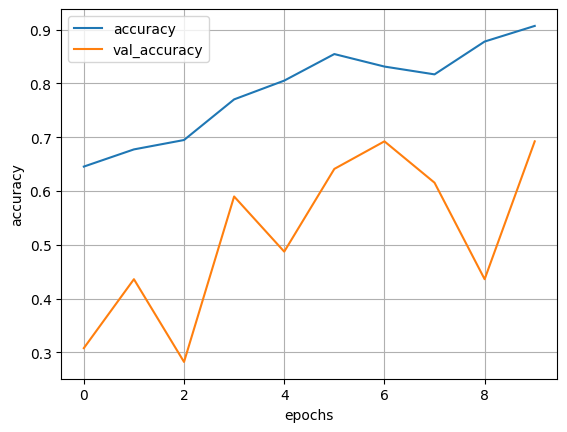

In [10]:
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history3_FineTune.history.items() if k in keys}

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

In [11]:
testLoss_FineTune, testAccuracy_FineTune = model3_FT.evaluate(x = X_test_std, y = y_test)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FineTune, testAccuracy_FineTune))

4/4 ━━━━━━━━━━━━━━━━━━━━ 30s 214ms/step - accuracy: 0.5813 - loss: 5.1364
Test-loss: 4.788933, Test-accuracy: 0.601562


In [12]:
model3_FT.load_weights("bestFT3.weights.h5")

testLoss_FineTune, testAccuracy_FineTune = model3_FT.evaluate(x = X_test_std, y = y_test)

print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FineTune, testAccuracy_FineTune))

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step - accuracy: 0.5156 - loss: 5.6864
Test-loss: 4.955560, Test-accuracy: 0.585938


In [13]:
y_proba = model3_FT.predict(X_test_std)
y_predict = np.argmax(y_proba, axis=-1)
print(y_predict)

4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 183ms/step
[3 3 3 2 2 0 3 0 2 0 3 3 0 0 2 2 3 2 2 2 0 2 2 3 2 1 1 0 0 2 1 1 0 0 1 1 2
 2 3 1 2 2 3 3 0 3 2 0 2 2 0 2 2 3 2 1 2 3 0 1 2 2 3 2 0 3 1 2 0 1 1 0 3 3
 2 3 0 3 1 0 2 3 3 2 3 3 3 3 2 2 0 1 3 0 3 2 2 3 0 3 0 2 0 1 1 3 2 0 1 2 3
 2 1 1 1 3 1 2 3 3 3 1 0 0 1 3 3 2]


In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = y_test, y_pred = y_predict)

array([[10,  4,  5,  6],
       [ 6, 16, 12,  1],
       [ 0,  2, 18,  0],
       [11,  1,  5, 31]])

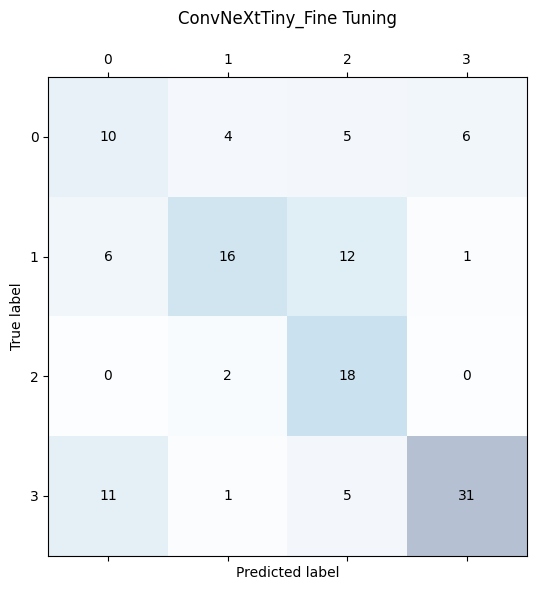

In [15]:
cm = confusion_matrix(y_true = y_test, y_pred = y_predict)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

ax.title.set_text('ConvNeXtTiny_Fine Tuning\n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig("ConfusionMatrix.png", dpi=300, format='png', pad_inches=0.3)
plt.show()

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score

pScore = precision_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Precision: ", pScore)

rScore = recall_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Recall: ", rScore)

fScore = f1_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("F1-score: ", fScore)

print("\n\n\n")

Precision:  0.6387889068988897
Recall:  0.5859375
F1-score:  0.5900810984825118






In [17]:
model3_FT.save('/content/drive/MyDrive/DLPROJECT/FT_ConvNeXtTiny_Best_Model.keras')